In [1]:
import requests
import json
import pandas as pd
import datetime
from datetime import datetime
import calendar
import pickle
import joblib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import sklearn
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 
import seaborn as sns

In [2]:
loc = {'ATL': '33.6407,-84.4277', 'LAX': '33.9416,-118.4085', 'ORD': '41.9802,-87.90899', 'DFW': '32.8998,-97.0403', 'DEN': '39.8561,-104.6737', 'JFK': '40.6413,-73.7781', 'SFO': '37.6213,-122.3790', 'LAS': '36.0840,-115.1537', 'SEA': '47.4480,-122.3088', 'CLT': '35.2144,-80.9473'}

In [3]:
url = 'https://api.weatherbit.io/v2.0/history/daily?'
APIKey = '9688b0708e704469beb49279f95cfdc6'

In [4]:
gets = []
for key, value in loc.items():
    lat = '&lat=' + value.split(",")[0]
    long = '&lon=' + value.split(",")[1]
    key = '&key=' + APIKey
    start_date = '&start_date=2022-11-17'
    end_date = '&end_date=2022-11-22'
    n = url+lat+long+key+start_date+end_date
    gets.append(n)

In [5]:
days = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thurday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
k = ['ATL', 'LAX', 'ORD', 'DFW', 'DEN', 'JFK', 'SFO', 'LAS', 'SEA', 'CLT']
locs = dict(zip(k, gets))

In [6]:
def get_forecast(air):
    airport = air
    loc = locs[airport]
    grid = requests.get(loc)
    data = grid.json()
    df = pd.DataFrame(data['data'])
    df['Airport'] = airport
    df['precip'] = df['precip'] * 0.0393701
    df['wind_spd'] = df['wind_spd'] * 1.94384
    if 'vis' in df.columns:
        df['vis'] = df['vis'] * 0.621371
    df['temp'] = (df['temp'] *9/5) + 32
    df['dewpt'] = (df['dewpt'] *9/5) + 32
    df['pres'] = df['slp'] * 0.02953
    df["TempDate"] = pd.to_datetime(df["datetime"])
    df['DOW'] = df['TempDate'].dt.dayofweek
    df['day_of_week'] = df['DOW'].replace(days)
    df['temp_month'] = df['TempDate']
    df['month'] = df['TempDate'].dt.month.apply(lambda x: calendar.month_name[x])
    df2 = pd.get_dummies(data = df, prefix = 'day_of_week', columns = ['day_of_week'])
    df3 = pd.get_dummies(data = df2, prefix = 'month', columns = ['month'])
    df3['airtemp'] = df3['Airport']
    df4 = pd.get_dummies(data = df3, prefix = 'origin', columns = ['airtemp'])
    temp_list = ['vis', 'day_of_week_Monday', 'day_of_week_Tuesday', 'day_of_week_Wednesday', 'day_of_week_Thursday', 'day_of_week_Friday', 'day_of_week_Saturday', 'day_of_week_Sunday', \
                'month_April', 'month_August', 'month_December', 'month_February', 'month_January', 'month_July', 'month_June', 'month_March', 'month_May', 'month_November', 'month_October', 'month_September', \
                'origin_ATL', 'origin_CLT', 'origin_DEN', 'origin_DFW', 'origin_JFK', 'origin_LAS', 'origin_LAX', 'origin_ORD', 'origin_SEA', 'origin_SFO']
    for i in temp_list:
        if i not in df4.columns:
            df4[i] = 0
    df4['datetime'] = pd.to_datetime(df4["datetime"])
    df4['Current Time'] = datetime.now().strftime('%Y-%m-%d')
    df4['vis'] = 15
    df4 = df4.rename(columns = {'dewpt': 'dewp', 'rh': 'relh', 'wind_spd': 'wind_speed', 'pres': 'alti', 'slp': 'pressure', 'vis': 'visib'})
    df4 = df4[['Current Time', 'Airport', 'datetime', 'precip', 'temp', 'dewp', 'relh', 'wind_dir', 'wind_speed', 'pressure', 'visib',
             'day_of_week_Friday', 'day_of_week_Monday', 'day_of_week_Saturday',
             'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday',
             'day_of_week_Wednesday', 'month_April', 'month_August', 'month_December',
             'month_February', 'month_January', 'month_July', 'month_June', 'month_March',
             'month_May', 'month_November', 'month_October', 'month_September',
             'origin_ATL', 'origin_CLT', 'origin_DEN', 'origin_DFW', 'origin_JFK',
             'origin_LAS', 'origin_LAX', 'origin_ORD', 'origin_SEA', 'origin_SFO']]
    return df4

In [7]:
temp_list = []
for i in k:
    ports = get_forecast(i)
    temp_list.append(ports)
df_future = pd.concat(temp_list)

In [8]:
act_weather = pd.read_csv('data/actual_weather.csv')
df_future = df_future.append(act_weather)
df_future.drop_duplicates(inplace= True)
df_future

C:\Users\Alex\AppData\Local\Temp\ipykernel_15324\277189194.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_future = df_future.append(act_weather)


,Current Time,Airport,datetime,precip,temp,dewp,relh,wind_dir,wind_speed,pressure,...,origin_ATL,origin_CLT,origin_DEN,origin_DFW,origin_JFK,origin_LAS,origin_LAX,origin_ORD,origin_SEA,origin_SFO
0,2022-11-22,ATL,2022-11-17 00:00:00,0.00000,39.74,22.28,53.8,317,7.580976,1025.1,...,1,0,0,0,0,0,0,0,0,0
1,2022-11-22,ATL,2022-11-21 00:00:00,0.00000,44.06,19.76,40.2,108,4.665216,1029.1,...,1,0,0,0,0,0,0,0,0,0
2,2022-11-22,ATL,2022-11-18 00:00:00,0.00000,33.62,22.46,49.3,324,6.803440,1026.4,...,1,0,0,0,0,0,0,0,0,0
3,2022-11-22,ATL,2022-11-20 00:00:00,0.00000,40.28,17.42,39.9,330,8.552896,1027.1,...,1,0,0,0,0,0,0,0,0,0
4,2022-11-22,ATL,2022-11-19 00:00:00,0.00000,43.88,29.12,57.0,303,6.025904,1026.2,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,11/17/2022,JFK,11/16/2022,0.11811,46.22,37.22,72.6,222,15.161952,1013.1,...,0,0,0,0,1,0,0,0,0,0
146,11/17/2022,SFO,11/16/2022,0.00000,54.68,35.42,51.7,139,5.442752,1027.2,...,0,0,0,0,0,0,0,0,0,1
147,11/17/2022,LAS,11/16/2022,0.00000,50.00,10.76,20.5,144,8.941664,1026.8,...,0,0,0,0,0,1,0,0,0,0
148,11/17/2022,SEA,11/16/2022,0.00000,40.28,33.44,77.6,123,5.637136,1032.7,...,0,0,0,0,0,0,0,0,1,0


In [9]:
gb_model = joblib.load('artifacts/gb_model.pkl')
gb_model_cols = pickle.load(open('artifacts/gb_model.pkl', 'rb'))
feats = df_future.iloc[:, 3:]
gb_preds = gb_model.predict(feats)

In [10]:
ls_model = joblib.load('artifacts/ls_model.pkl')
ls_preds = ls_model.predict(feats)

In [11]:
rf_model = joblib.load('artifacts/rf_model.pkl')
rf_preds = rf_model.predict(feats)

In [12]:
stacking_model = joblib.load('artifacts/stacking_model.pkl')
stacking_preds = stacking_model.predict(feats)

In [13]:
df_future['gb_model_actual_weather'] = gb_preds
df_future['ls_model_actual_weather'] = ls_preds
df_future['rf_model_actual_weather'] = rf_preds
df_future['stacking_model_actual_weather'] = stacking_preds

In [14]:
df_future

,Current Time,Airport,datetime,precip,temp,dewp,relh,wind_dir,wind_speed,pressure,...,origin_JFK,origin_LAS,origin_LAX,origin_ORD,origin_SEA,origin_SFO,gb_model_actual_weather,ls_model_actual_weather,rf_model_actual_weather,stacking_model_actual_weather
0,2022-11-22,ATL,2022-11-17 00:00:00,0.00000,39.74,22.28,53.8,317,7.580976,1025.1,...,0,0,0,0,0,0,0.104391,0.031278,0.119143,0.070136
1,2022-11-22,ATL,2022-11-21 00:00:00,0.00000,44.06,19.76,40.2,108,4.665216,1029.1,...,0,0,0,0,0,0,0.109273,0.029141,0.124761,0.072191
2,2022-11-22,ATL,2022-11-18 00:00:00,0.00000,33.62,22.46,49.3,324,6.803440,1026.4,...,0,0,0,0,0,0,0.134797,0.046358,0.145578,0.096934
3,2022-11-22,ATL,2022-11-20 00:00:00,0.00000,40.28,17.42,39.9,330,8.552896,1027.1,...,0,0,0,0,0,0,0.137664,0.025075,0.128775,0.088065
4,2022-11-22,ATL,2022-11-19 00:00:00,0.00000,43.88,29.12,57.0,303,6.025904,1026.2,...,0,0,0,0,0,0,0.088701,0.010063,0.110574,0.051748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,11/17/2022,JFK,11/16/2022,0.11811,46.22,37.22,72.6,222,15.161952,1013.1,...,1,0,0,0,0,0,0.238174,0.297412,0.188953,0.260545
146,11/17/2022,SFO,11/16/2022,0.00000,54.68,35.42,51.7,139,5.442752,1027.2,...,0,0,0,0,0,1,0.107122,0.061751,0.126864,0.083693
147,11/17/2022,LAS,11/16/2022,0.00000,50.00,10.76,20.5,144,8.941664,1026.8,...,0,1,0,0,0,0,0.161152,0.065494,0.157650,0.122351
148,11/17/2022,SEA,11/16/2022,0.00000,40.28,33.44,77.6,123,5.637136,1032.7,...,0,0,0,0,1,0,0.109498,0.008244,0.123472,0.065547


In [15]:
past = pd.read_csv('data/All_Future_Predictions_w_Attributes.csv')
past.drop_duplicates(inplace = True)
past['Date'] = pd.to_datetime(past['Date'])
past['Current Time'] = pd.to_datetime(past['Current Time'])
past['Days Ahead'] = past['Date'] - past['Current Time']
past

,Current Time,Airport,Date,Days Ahead,Precipitation (inches/hour),Temperature (F),Dew Point (F),Relative Humidity (%),Wind Direction (Degrees),Wind Speed (mph),...,origin_JFK,origin_LAS,origin_LAX,origin_ORD,origin_SEA,origin_SFO,gb_model,ls_model,rf_model,stacking_model
0,2022-11-02,ATL,2022-11-02,0 days,0.000000,64.04,53.06,69,91,3.693296,...,0,0,0,0,0,0,0.088980,0.012128,0.106598,0.052232
1,2022-11-02,ATL,2022-11-03,1 days,0.000000,60.98,51.98,74,75,5.053984,...,0,0,0,0,0,0,0.082807,0.065255,0.104861,0.068806
2,2022-11-02,ATL,2022-11-04,2 days,0.007382,59.90,53.42,80,82,6.414672,...,0,0,0,0,0,0,0.161498,0.107355,0.139163,0.135567
3,2022-11-02,ATL,2022-11-05,3 days,0.012303,68.36,58.10,72,145,6.609056,...,0,0,0,0,0,0,0.151300,0.053129,0.164794,0.112858
4,2022-11-02,ATL,2022-11-06,4 days,0.174705,68.00,63.86,87,104,5.442752,...,0,0,0,0,0,0,0.229946,0.418315,0.163055,0.298361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,2022-11-22,CLT,2022-12-03,11 days,0.000000,47.84,36.32,64,208,4.859600,...,0,0,0,0,0,0,0.148393,0.065467,0.133434,0.110923
2396,2022-11-22,CLT,2022-12-04,12 days,0.000000,59.36,51.98,79,218,9.330432,...,0,0,0,0,0,0,0.149237,0.108148,0.154408,0.131779
2397,2022-11-22,CLT,2022-12-05,13 days,0.022146,64.04,57.74,80,239,9.330432,...,0,0,0,0,0,0,0.235230,0.164476,0.214466,0.211863
2398,2022-11-22,CLT,2022-12-06,14 days,0.014764,46.76,25.52,48,28,4.859600,...,0,0,0,0,0,0,0.182428,0.088998,0.168045,0.144062


In [16]:
df_actual = df_future
df_actual['datetime'] = pd.to_datetime(df_actual['datetime'])
forecast_error = pd.merge(past, df_actual, left_on = ['Airport', 'Date'], right_on = ['Airport', 'datetime'], how = 'inner')
forecast_error

,Current Time_x,Airport,Date,Days Ahead,Precipitation (inches/hour),Temperature (F),Dew Point (F),Relative Humidity (%),Wind Direction (Degrees),Wind Speed (mph),...,origin_JFK_y,origin_LAS_y,origin_LAX_y,origin_ORD_y,origin_SEA_y,origin_SFO_y,gb_model_actual_weather,ls_model_actual_weather,rf_model_actual_weather,stacking_model_actual_weather
0,2022-11-02,ATL,2022-11-02,0 days,0.000000,64.04,53.06,69,91,3.693296,...,0,0,0,0,0,0,0.090115,0.026247,0.101952,0.057784
1,2022-11-02,ATL,2022-11-03,1 days,0.000000,60.98,51.98,74,75,5.053984,...,0,0,0,0,0,0,0.099508,0.047067,0.108520,0.072130
2,2022-11-02,ATL,2022-11-04,2 days,0.007382,59.90,53.42,80,82,6.414672,...,0,0,0,0,0,0,0.115567,0.064656,0.123628,0.090184
3,2022-11-04,ATL,2022-11-04,0 days,0.000000,68.18,51.98,57,100,6.609056,...,0,0,0,0,0,0,0.115567,0.064656,0.123628,0.090184
4,2022-11-02,ATL,2022-11-05,3 days,0.012303,68.36,58.10,72,145,6.609056,...,0,0,0,0,0,0,0.097572,0.033323,0.134597,0.070136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,2022-11-16,CLT,2022-11-21,5 days,0.000000,38.48,16.52,41,179,3.110144,...,0,0,0,0,0,0,0.127559,0.037178,0.128482,0.086733
1256,2022-11-17,CLT,2022-11-21,4 days,0.000000,39.92,19.94,45,195,3.498912,...,0,0,0,0,0,0,0.127559,0.037178,0.128482,0.086733
1257,2022-11-18,CLT,2022-11-21,3 days,0.000000,39.38,15.44,38,162,2.721376,...,0,0,0,0,0,0,0.127559,0.037178,0.128482,0.086733
1258,2022-11-19,CLT,2022-11-21,2 days,0.000000,36.86,9.50,32,152,3.304528,...,0,0,0,0,0,0,0.127559,0.037178,0.128482,0.086733


In [17]:
forecast_error['precip_error'] = abs((forecast_error['Precipitation (inches/hour)'] - forecast_error['precip']) / (forecast_error['Precipitation (inches/hour)']))
forecast_error['temp_error'] = abs((forecast_error['Temperature (F)'] - forecast_error['temp']) / forecast_error['Temperature (F)'])
forecast_error['dewpt_error'] = abs((forecast_error['Dew Point (F)'] - forecast_error['dewp']) / forecast_error['Dew Point (F)'])
forecast_error['relh_error'] = abs((forecast_error['Relative Humidity (%)'] - forecast_error['relh']) / forecast_error['Relative Humidity (%)'])
forecast_error['wind_dir_error'] = abs((forecast_error['Wind Direction (Degrees)'] - forecast_error['wind_dir']) / forecast_error['Wind Direction (Degrees)'])
forecast_error['wind_speed_error'] = abs((forecast_error['Wind Speed (mph)'] - forecast_error['wind_speed']) / forecast_error['Wind Speed (mph)'])
forecast_error['pressure_error'] = abs((forecast_error['Pressure (mb)'] - forecast_error['pressure']) / forecast_error['Pressure (mb)'])

C:\Users\Alex\AppData\Local\Temp\ipykernel_15324\935789894.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  errors = forecast_error.groupby('Days Ahead')['precip_error','temp_error',


<Figure size 800x480 with 0 Axes>

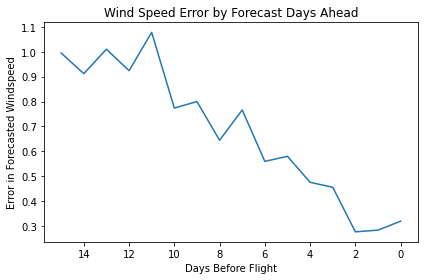

<Figure size 800x480 with 0 Axes>

In [18]:
errors = forecast_error.groupby('Days Ahead')['precip_error','temp_error',
       'dewpt_error', 'relh_error', 'wind_dir_error', 'wind_speed_error',
       'pressure_error'].mean().reset_index()

plt.plot(errors[['wind_speed_error']])
plt.gca().invert_xaxis()
plt.title('Wind Speed Error by Forecast Days Ahead')
plt.xlabel('Days Before Flight')
plt.ylabel('Error in Forecasted Windspeed')
plt.tight_layout()
figure(figsize=(10, 6), dpi=80)

In [19]:
actual_weather_pred = df_future
display(actual_weather_pred)
actuals = pd.read_csv('data/actual_delay_rate.csv')

,Current Time,Airport,datetime,precip,temp,dewp,relh,wind_dir,wind_speed,pressure,...,origin_JFK,origin_LAS,origin_LAX,origin_ORD,origin_SEA,origin_SFO,gb_model_actual_weather,ls_model_actual_weather,rf_model_actual_weather,stacking_model_actual_weather
0,2022-11-22,ATL,2022-11-17,0.00000,39.74,22.28,53.8,317,7.580976,1025.1,...,0,0,0,0,0,0,0.104391,0.031278,0.119143,0.070136
1,2022-11-22,ATL,2022-11-21,0.00000,44.06,19.76,40.2,108,4.665216,1029.1,...,0,0,0,0,0,0,0.109273,0.029141,0.124761,0.072191
2,2022-11-22,ATL,2022-11-18,0.00000,33.62,22.46,49.3,324,6.803440,1026.4,...,0,0,0,0,0,0,0.134797,0.046358,0.145578,0.096934
3,2022-11-22,ATL,2022-11-20,0.00000,40.28,17.42,39.9,330,8.552896,1027.1,...,0,0,0,0,0,0,0.137664,0.025075,0.128775,0.088065
4,2022-11-22,ATL,2022-11-19,0.00000,43.88,29.12,57.0,303,6.025904,1026.2,...,0,0,0,0,0,0,0.088701,0.010063,0.110574,0.051748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,11/17/2022,JFK,2022-11-16,0.11811,46.22,37.22,72.6,222,15.161952,1013.1,...,1,0,0,0,0,0,0.238174,0.297412,0.188953,0.260545
146,11/17/2022,SFO,2022-11-16,0.00000,54.68,35.42,51.7,139,5.442752,1027.2,...,0,0,0,0,0,1,0.107122,0.061751,0.126864,0.083693
147,11/17/2022,LAS,2022-11-16,0.00000,50.00,10.76,20.5,144,8.941664,1026.8,...,0,1,0,0,0,0,0.161152,0.065494,0.157650,0.122351
148,11/17/2022,SEA,2022-11-16,0.00000,40.28,33.44,77.6,123,5.637136,1032.7,...,0,0,0,0,1,0,0.109498,0.008244,0.123472,0.065547


In [20]:
testing = pd.read_csv('data/All_Future_Predictions_w_Attributes.csv')
testing = testing[['Current Time', 'Airport', 'Date', 'gb_model', 'ls_model', 'rf_model', 'stacking_model']]

In [21]:
testing['Current Time'] = pd.to_datetime(testing['Current Time'])
testing['Date'] = pd.to_datetime(testing['Date'])
actuals['Date'] = pd.to_datetime(actuals['Date'])

In [22]:
Test_predictors = testing.merge(actuals, left_on = ['Date', 'Airport'], right_on = ['Date', 'Airport'], how = 'inner')
Test_predictors

,Current Time,Airport,Date,gb_model,ls_model,rf_model,stacking_model,Actual Rate
0,2022-11-02,ATL,2022-11-11,0.140260,0.061368,0.149049,0.106467,0.21
1,2022-11-04,ATL,2022-11-11,0.303543,0.196563,0.201131,0.261564,0.21
2,2022-11-06,ATL,2022-11-11,0.269169,0.112197,0.204329,0.209196,0.21
3,2022-11-09,ATL,2022-11-11,0.310253,0.902343,0.255265,0.902343,0.21
4,2022-11-10,ATL,2022-11-11,0.316820,0.902343,0.271927,0.811538,0.21
...,...,...,...,...,...,...,...,...
895,2022-11-16,CLT,2022-11-21,0.126436,0.031082,0.131055,0.083780,0.14
896,2022-11-17,CLT,2022-11-21,0.117124,0.034787,0.125588,0.079214,0.14
897,2022-11-18,CLT,2022-11-21,0.126475,0.028725,0.137385,0.083673,0.14
898,2022-11-19,CLT,2022-11-21,0.130113,0.094559,0.148519,0.112057,0.14


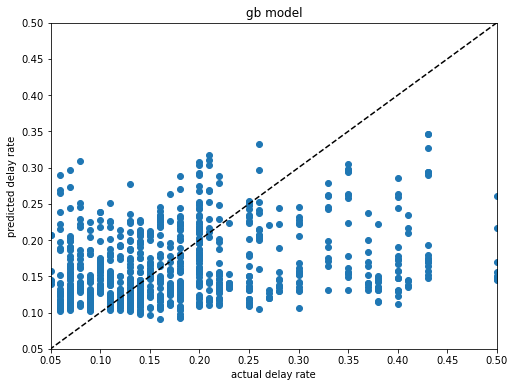

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(Test_predictors['Actual Rate'] , Test_predictors['gb_model'])
plt.plot([0.01,0.5], [0.01,0.5], 'k--')
plt.ylim([0.05, 0.5])
plt.xlim([0.05, 0.5])
plt.xlabel('actual delay rate')
plt.ylabel('predicted delay rate')
plt.title('gb model')
plt.show()

In [24]:
import sklearn
from sklearn import metrics

In [25]:
def get_stats(df):
    actuals = df['Actual Rate']
    mod_list = ['gb_model', 'ls_model', 'rf_model', 'stacking_model']
    stats = {}
    for i in mod_list:
        s_preds = df[i]
        mae = metrics.mean_absolute_error(actuals, s_preds)
        msqe = metrics.mean_squared_error(actuals, s_preds)
        rmse = np.sqrt(metrics.mean_squared_error(actuals, s_preds))
        stats[i]= [mae, msqe, rmse]
    return stats

Text(0.5, 1.0, 'Actual Delay Rate vs. Predicted for Forecasted Weather')

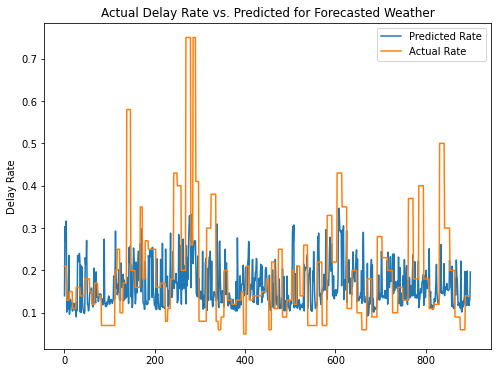

In [26]:
futurestats = get_stats(Test_predictors)
first = pd.DataFrame(pd.DataFrame(futurestats).T)
first = first.rename(columns = {0: 'Mean Absolute Error', 1: 'Mean Squared Error', 2: 'Mean Square Root Error'})
plt.figure(figsize=(8, 6))
plt.plot(Test_predictors[['gb_model', 'Actual Rate']])
plt.legend(['Predicted Rate', 'Actual Rate'])
plt.ylabel('Delay Rate')
plt.title('Actual Delay Rate vs. Predicted for Forecasted Weather')

In [27]:
def get_stats2(df):
    actuals = df['Actual Rate']
    mod_list = ['gb_model_actual_weather', 'ls_model_actual_weather', 'rf_model_actual_weather', 'stacking_model_actual_weather']
    stats = {}
    for i in mod_list:
        s_preds = df[i]
        mae = metrics.mean_absolute_error(actuals, s_preds)
        msqe = metrics.mean_squared_error(actuals, s_preds)
        rmse = np.sqrt(metrics.mean_squared_error(actuals, s_preds))
        stats[i]= [mae, msqe, rmse]
    return stats

Text(0.5, 1.0, 'Actual Delay Rate vs. Predicted for Actual Weather')

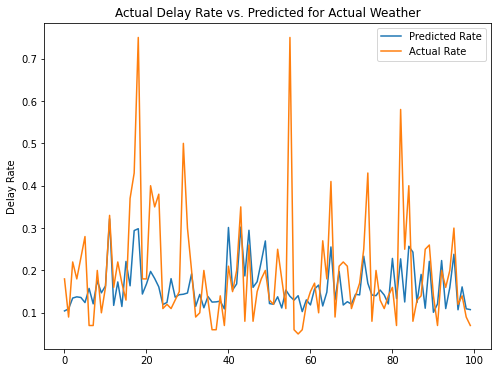

In [28]:
actual_weather_pred['datetime'] = pd.to_datetime(actual_weather_pred['datetime'])
Test_actuals = actual_weather_pred.merge(actuals, left_on = ['datetime', 'Airport'], right_on = ['Date', 'Airport'], how = 'inner')
act_stats = get_stats2(Test_actuals)
second = pd.DataFrame(pd.DataFrame(act_stats).T)
second = second.rename(columns = {0: 'Mean Absolute Error', 1: 'Mean Squared Error', 2: 'Mean Square Root Error'})
plt.figure(figsize=(8, 6))
plt.plot(Test_actuals[['gb_model_actual_weather', 'Actual Rate']])
plt.legend(['Predicted Rate', 'Actual Rate'])
plt.ylabel('Delay Rate')
plt.title('Actual Delay Rate vs. Predicted for Actual Weather')

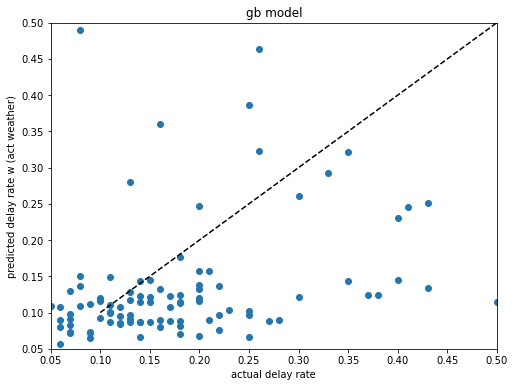

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(Test_actuals['Actual Rate'] , Test_actuals['stacking_model_actual_weather'])
plt.plot([0.1,0.5], [0.1,0.5], 'k--')
plt.ylim([0.05, 0.5])
plt.xlim([0.05, 0.5])
plt.xlabel('actual delay rate')
plt.ylabel('predicted delay rate w (act weather)')
plt.title('gb model')
plt.show()

In [30]:
testing_results = first.append(second)
display(testing_results)
#testing_results.to_excel('Model_Testing_Results.xlsx')

C:\Users\Alex\AppData\Local\Temp\ipykernel_15324\2154048837.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  testing_results = first.append(second)


,Mean Absolute Error,Mean Squared Error,Mean Square Root Error
gb_model,0.085267,0.016388,0.128015
ls_model,0.162470,0.058862,0.242615
rf_model,0.085063,0.017414,0.131960
stacking_model,0.118931,0.034860,0.186708
gb_model_actual_weather,0.076218,0.014676,0.121143
ls_model_actual_weather,0.159651,0.071777,0.267912
rf_model_actual_weather,0.079967,0.016692,0.129196
stacking_model_actual_weather,0.100962,0.025492,0.159661


In [31]:
com = pd.read_csv('data/All_Future_Predictions_w_Attributes.csv')
com['Date'] = pd.to_datetime(com['Date'])
Day_list = []
Days_Ahead = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
for i in Days_Ahead:
    daysa_ = com.loc[com['Days Ahead'] == i]
    x = daysa_.merge(actuals, left_on = ['Date', 'Airport'], right_on = ['Date', 'Airport'], how = 'inner')
    Day_list.append(x)

In [32]:
D = {}
mae = []
mse = []
rmse = []
for y,b in zip(Day_list, Days_Ahead):
    act_stats = get_stats(y)
    mae.append(list(act_stats.values())[0][0])
    mse.append(list(act_stats.values())[0][1])
    rmse.append(list(act_stats.values())[0][2])
day_check = pd.DataFrame([mae, mse, rmse]).transpose()
day_check = day_check.rename(columns = {0: 'mae', 1: 'mse', 2: 'rmse'})
day_check

,mae,mse,rmse
0,0.084660,0.015403,0.124110
1,0.079707,0.012207,0.110486
2,0.082089,0.014868,0.121933
3,0.084087,0.016046,0.126673
4,0.075570,0.013269,0.115192
5,0.085301,0.018001,0.134169
6,0.090902,0.017203,0.131162
7,0.087081,0.016236,0.127422
8,0.088382,0.018623,0.136468
9,0.085780,0.013739,0.117213


<Figure size 800x480 with 0 Axes>

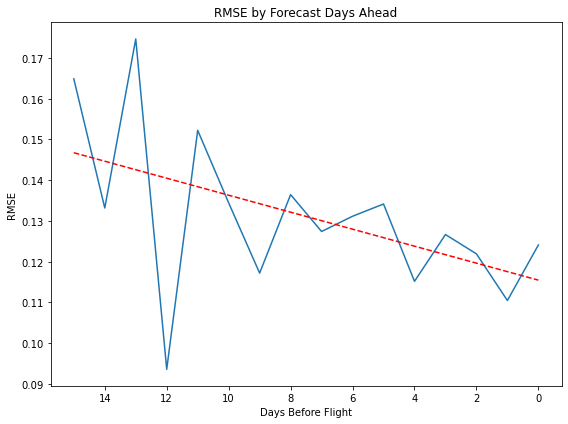

<Figure size 800x480 with 0 Axes>

In [33]:
day_check.reset_index(inplace=True)
day_checks = day_check.rename(columns = {'index':'Days Before Flight'})
day_checks = day_checks.sort_values(by = 'Days Before Flight', ascending = False)
xs = day_checks['Days Before Flight']
ys = day_checks['rmse']
plt.figure(figsize=(8, 6))
plt.plot(xs, ys)
z = np.polyfit(xs, ys, 1)
p = np.poly1d(z)
plt.plot(xs,p(xs),"r--")
plt.gca().invert_xaxis()
plt.title('RMSE by Forecast Days Ahead')
plt.xlabel('Days Before Flight')
plt.ylabel('RMSE')
plt.tight_layout()
figure(figsize=(10, 6), dpi=80)

In [34]:
temp = Test_actuals[['datetime', 'Airport', 'gb_model_actual_weather', 'ls_model_actual_weather', 'rf_model_actual_weather', 'stacking_model_actual_weather', 'Actual Rate']]
temp = temp.sort_values(by = 'datetime')
temp

,datetime,Airport,gb_model_actual_weather,ls_model_actual_weather,rf_model_actual_weather,stacking_model_actual_weather,Actual Rate
49,2022-11-11,CLT,0.269610,1.112164,0.220548,0.597685,0.20
40,2022-11-11,ATL,0.301390,1.803352,0.210730,0.879629,0.21
41,2022-11-11,LAX,0.153791,0.080801,0.148581,0.121138,0.15
42,2022-11-11,ORD,0.168185,0.096966,0.158045,0.137890,0.20
43,2022-11-11,DFW,0.302437,0.348990,0.211997,0.321305,0.35
...,...,...,...,...,...,...,...
25,2022-11-21,SFO,0.124447,0.093669,0.142448,0.108295,0.12
32,2022-11-21,SEA,0.115155,0.024168,0.120308,0.073544,0.09
1,2022-11-21,ATL,0.109273,0.029141,0.124761,0.072191,0.09
30,2022-11-21,LAS,0.146693,0.086009,0.157753,0.121175,0.30


C:\Users\Alex\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 2800x1600 with 0 Axes>

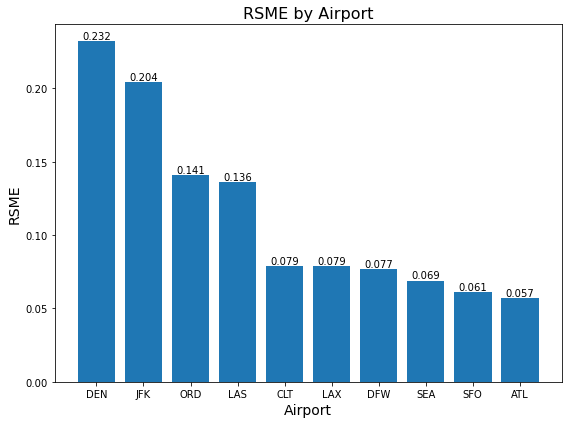

<Figure size 2800x1600 with 0 Axes>

In [35]:
def r2_rmse(g):
    rmse = np.sqrt(mean_squared_error(g['Actual Rate'], g['gb_model']))
    return pd.Series(dict(rmse = rmse))

Airport_RMSE = Test_predictors.groupby('Airport').apply(r2_rmse).reset_index()
Airport_RMSE = Airport_RMSE.sort_values(by = 'rmse', ascending = False)
x_ = Airport_RMSE['Airport']
y_ = round(Airport_RMSE['rmse'], 3)
plt.figure(figsize=(8, 6))
splot=sns.barplot(x_, y_)
plt.bar(x_, y_)
plt.xlabel('Airport', size = 14)
plt.ylabel('RSME', size = 14)
plt.title('RSME by Airport', size = 16)
plt.bar_label(splot.containers[0])
plt.tight_layout()
figure(figsize=(14, 8), dpi=200)

<Figure size 2800x1600 with 0 Axes>

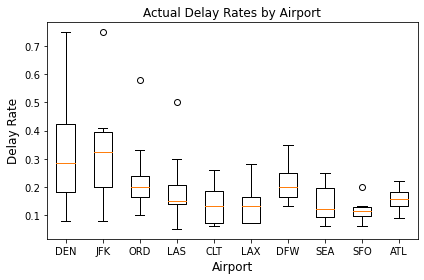

<Figure size 2800x1600 with 0 Axes>

In [36]:
gr = actuals[['Airport', 'Actual Rate']]
airports = ['DEN', 'JFK', 'ORD', 'LAS', 'CLT', 'LAX', 'DFW', 'SEA', 'SFO', 'ATL']
l = []
for i in airports:
    x = gr[gr['Airport'] == i]['Actual Rate'].to_list()
    l.append(x)

plt.boxplot(l, labels = airports)
plt.title('Actual Delay Rates by Airport', size = 12)
plt.xlabel('Airport', size = 12)
plt.ylabel('Delay Rate', size = 12)
plt.tight_layout()
figure(figsize=(14, 8), dpi=200)